In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


In [326]:
from google.colab import files
uploaded = files.upload()

Saving bigmart_train.csv to bigmart_train (3).csv


In [327]:
df = pd.read_csv('bigmart_train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [328]:
df.shape

(8523, 12)

In [329]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [330]:
p = df['Item_Weight'].mean()
p

12.857645184136183

In [0]:
df['Item_Weight'].replace(np.nan, p, inplace=True)

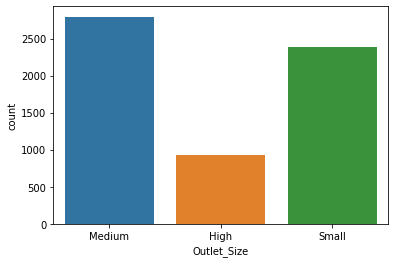

In [332]:
sns.countplot(x='Outlet_Size', data=df)

In [333]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [334]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [335]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


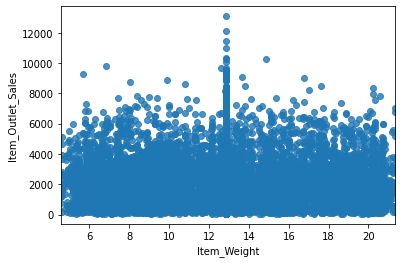

In [336]:
sns.regplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
#not a useful data

In [0]:
df.drop("Item_Weight", axis = 1, inplace=True)

In [338]:
uniquel = set(df['Item_Fat_Content'])
uniquel

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [339]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
uniquel = set(df['Item_Fat_Content'])
uniquel

{'Low Fat', 'Regular'}

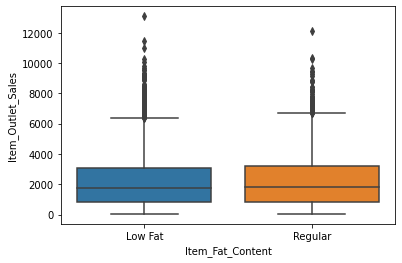

In [340]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

In [0]:
#not useful column
df.drop('Item_Fat_Content', axis = 1, inplace=True)

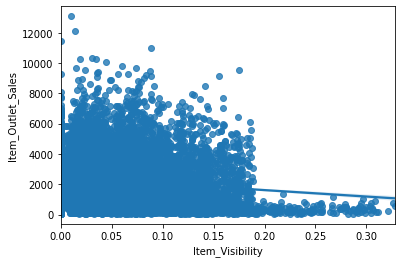

In [342]:
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)

In [0]:
#not helpful
df.drop('Item_Visibility', axis = 1, inplace=True)

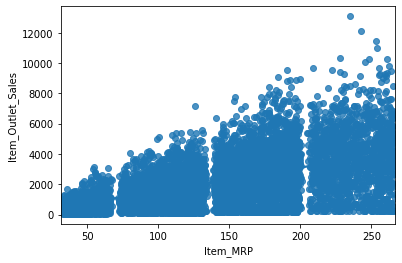

In [344]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
#more mrp more sales

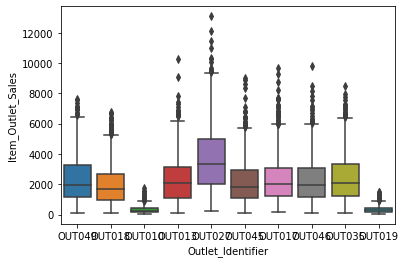

In [345]:
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)

In [0]:
#now much useful data
df.drop('Outlet_Identifier', axis=1, inplace = True)

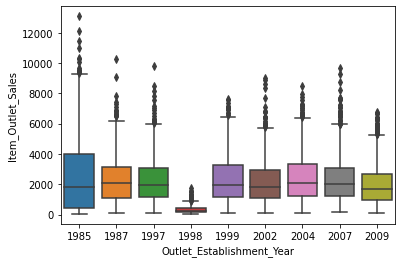

In [347]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)
#bit useful data

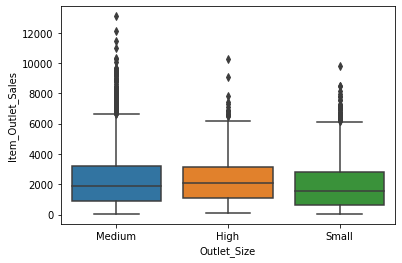

In [348]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
#useful data

In [349]:
df.drop('Item_Identifier', axis=1, inplace=True)
df.head()

,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [350]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [351]:
dummy_variable_1 = pd.get_dummies(df["Item_Type"])
dummy_variable_1.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [352]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Item_Type", axis = 1, inplace=True)
df.head()

,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [353]:
dummy_variable_1 = pd.get_dummies(df["Outlet_Size"])
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Outlet_Size", axis = 1, inplace=True)

dummy_variable_1 = pd.get_dummies(df["Outlet_Establishment_Year"])
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Outlet_Establishment_Year", axis = 1, inplace=True)

dummy_variable_1 = pd.get_dummies(df["Outlet_Location_Type"])
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Outlet_Location_Type", axis = 1, inplace=True)

dummy_variable_1 = pd.get_dummies(df["Outlet_Type"])
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Outlet_Type", axis = 1, inplace=True)

df.head()

,Item_MRP,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,1985,1987,1997,1998,1999,2002,2004,2007,2009,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,48.2692,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,182.0950,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [354]:
x_data = df.drop(['Item_Outlet_Sales'], axis=1)
y_data = df['Item_Outlet_Sales']
x_data.shape

(8523, 36)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [356]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm.fit(x_train, y_train)
test_y_hat = lm.predict(x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("Accuracy of train dataset is : ",lm.score(x_train,y_train))
print("Accuracy of test dataset is : ",lm.score(x_test,y_test))

Mean absolute error: 847.15
Residual sum of squares (MSE): 1244779.05
Accuracy of train dataset is :  0.5631501701494923
Accuracy of test dataset is :  0.5632638105274771


In [357]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(x_train,y_train)
predictions = my_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
print("Accuracy of train dataset is : ",my_model.score(x_train,y_train))
print("Accuracy of test dataset is : ",my_model.score(x_test,y_test))

[12:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error: 767.33
Residual sum of squares (MSE): 1194594.79
Accuracy of train dataset is :  0.6943524912095881
Accuracy of test dataset is :  0.5808711766346164


In [358]:
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import mean_squared_error

lassoreg = Lasso(alpha = 0.001,normalize = True)
lassoreg.fit(x_train,y_train)

pred_lasso = lassoreg.predict(x_test) 

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_lasso - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_lasso - y_test) ** 2))
print("Accuracy of train dataset is : ",lassoreg.score(x_train,y_train))
print("Accuracy of test dataset is : ",lassoreg.score(x_test,y_test))

Mean absolute error: 847.14
Residual sum of squares (MSE): 1244746.37
Accuracy of train dataset is :  0.563150115277822
Accuracy of test dataset is :  0.5632752749143858


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28122726.854299545, tolerance: 2116089.040286131
  positive)


In [359]:
from sklearn.linear_model import Ridge 
from math import sqrt
from sklearn.metrics import mean_squared_error
ridgereg = Ridge(alpha = 0.001,normalize = True)

ridgereg.fit(x_train,y_train)
pred_rig = ridgereg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_rig - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_rig - y_test) ** 2))
print("Accuracy of train dataset is : ",ridgereg.score(x_train,y_train))
print("Accuracy of test dataset is : ",ridgereg.score(x_test,y_test))

Mean absolute error: 847.08
Residual sum of squares (MSE): 1244575.22
Accuracy of train dataset is :  0.5631497074946088
Accuracy of test dataset is :  0.5633353259452432
